<a href="https://colab.research.google.com/github/Arnavkode/ML-lab/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df['label'] = df['label_ham'].astype(int)
df = df.drop(columns=['label_ham', 'label_spam'])
display(df.head())

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,label
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,1
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1


In [12]:
df['v2'] = df['v2'].str.lower()
display(df.head())

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,label
0,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN,1
1,ok lar... joking wif u oni...,NaN,NaN,NaN,1
2,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN,0
3,u dun say so early hor... u c already then say...,NaN,NaN,NaN,1
4,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1


In [13]:
import string

def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

df['v2'] = df['v2'].apply(remove_punctuation)
display(df.head())

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,label
0,go until jurong point crazy available only in ...,NaN,NaN,NaN,1
1,ok lar joking wif u oni,NaN,NaN,NaN,1
2,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN,0
3,u dun say so early hor u c already then say,NaN,NaN,NaN,1
4,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN,1


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords corpus if it hasn't been downloaded yet
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
# Download 'punkt' and 'punkt_tab' as word_tokenize and PunktTokenizer might require them
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')
try:
    from nltk.tokenize.punkt import PunktTokenizer
    PunktTokenizer()
except LookupError:
    nltk.download('punkt_tab')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

df['v2'] = df['v2'].apply(remove_stopwords)
display(df.head())

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,label
0,go jurong point crazy available bugis n great ...,NaN,NaN,NaN,1
1,ok lar joking wif u oni,NaN,NaN,NaN,1
2,free entry 2 wkly comp win fa cup final tkts 2...,NaN,NaN,NaN,0
3,u dun say early hor u c already say,NaN,NaN,NaN,1
4,nah dont think goes usf lives around though,NaN,NaN,NaN,1


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['v2'])

print("TF-IDF vectorization complete. Shape of the feature matrix:")
print(X.shape)

TF-IDF vectorization complete. Shape of the feature matrix:
(5572, 9372)


In [19]:
from sklearn.model_selection import train_test_split

y = df['label'] # Corrected to use 'label' as the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Data split into training and testing sets.
X_train shape: (4457, 9372)
X_test shape: (1115, 9372)
y_train shape: (4457,)
y_test shape: (1115,)

Class distribution in training set:
label
1    0.865829
0    0.134171
Name: proportion, dtype: float64

Class distribution in testing set:
label
1    0.866368
0    0.133632
Name: proportion, dtype: float64


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Stump classifier
decision_stump = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train the Decision Stump classifier
decision_stump.fit(X_train, y_train)

print("Decision Stump classifier initialized and trained successfully.")

Decision Stump classifier initialized and trained successfully.


In [21]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = decision_stump.predict(X_train)
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = decision_stump.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8838
Test Accuracy: 0.8924


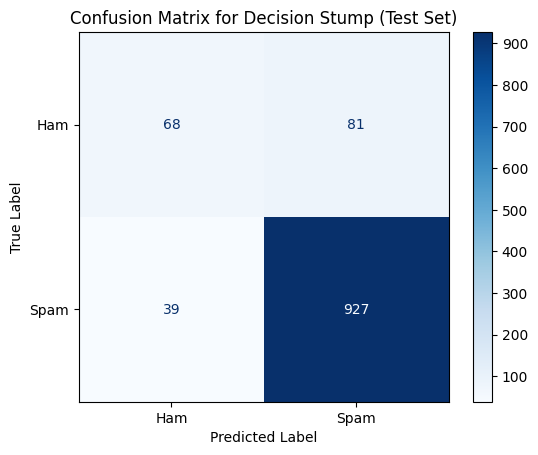

Confusion matrix displayed successfully.


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Stump (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix displayed successfully.")

In [23]:
n_samples = X_train.shape[0]
D = np.full(n_samples, 1 / n_samples)

weighted_errors = []
alphas = []
weak_learners = []

n_estimators = 50

print(f"Initial sample weights (D) created with shape: {D.shape}")
print(f"Number of boosting iterations (n_estimators): {n_estimators}")

Initial sample weights (D) created with shape: (4457,)
Number of boosting iterations (n_estimators): 50


In [24]:
y_train_mapped = y_train.apply(lambda x: 1 if x == 1 else -1)

for i in range(n_estimators):
    # a. Initialize a Decision Stump classifier
    stump = DecisionTreeClassifier(max_depth=1, random_state=42)

    # b. Train the Decision Stump classifier using sample weights
    stump.fit(X_train, y_train_mapped, sample_weight=D)

    # c. Make predictions on the training data
    y_train_pred_mapped = np.array([1 if p == 1 else -1 for p in stump.predict(X_train)])

    # d. Calculate the weighted error
    misclassified = (y_train_mapped != y_train_pred_mapped)
    weighted_error = np.sum(D[misclassified])

    # e. Break if weighted error is 0 or >= 0.5
    if weighted_error == 0 or weighted_error >= 0.5:
        print(f"Stopping at iteration {i} due to weighted error: {weighted_error:.4f}")
        break

    # f. Calculate the alpha value
    alpha = 0.5 * np.log((1.0 - weighted_error) / weighted_error)

    # g. Append weighted_error
    weighted_errors.append(weighted_error)

    # h. Append alpha
    alphas.append(alpha)

    # i. Append the weak learner
    weak_learners.append(stump)

    # j. Update the sample weights
    D = D * np.exp(-alpha * y_train_mapped * y_train_pred_mapped)

    # k. Normalize the updated sample weights
    D = D / np.sum(D)

    print(f"Iteration {i+1}/{n_estimators}: Weighted Error = {weighted_error:.4f}, Alpha = {alpha:.4f}")

print("AdaBoost iterations complete.")
print(f"Number of weak learners trained: {len(weak_learners)}")

Iteration 1/50: Weighted Error = 0.1162, Alpha = 1.0144
Iteration 2/50: Weighted Error = 0.2616, Alpha = 0.5189
Iteration 3/50: Weighted Error = 0.3421, Alpha = 0.3269
Iteration 4/50: Weighted Error = 0.3570, Alpha = 0.2941
Iteration 5/50: Weighted Error = 0.4398, Alpha = 0.1209
Iteration 6/50: Weighted Error = 0.4093, Alpha = 0.1835
Iteration 7/50: Weighted Error = 0.4265, Alpha = 0.1480
Iteration 8/50: Weighted Error = 0.4256, Alpha = 0.1499
Iteration 9/50: Weighted Error = 0.4366, Alpha = 0.1274
Iteration 10/50: Weighted Error = 0.4327, Alpha = 0.1354
Iteration 11/50: Weighted Error = 0.4420, Alpha = 0.1166
Iteration 12/50: Weighted Error = 0.4407, Alpha = 0.1192
Iteration 13/50: Weighted Error = 0.4474, Alpha = 0.1056
Iteration 14/50: Weighted Error = 0.4391, Alpha = 0.1223
Iteration 15/50: Weighted Error = 0.4466, Alpha = 0.1071
Iteration 16/50: Weighted Error = 0.4334, Alpha = 0.1340
Iteration 17/50: Weighted Error = 0.4440, Alpha = 0.1126
Iteration 18/50: Weighted Error = 0.4507

In [25]:
def adaboost_predict(X, weak_learners, alphas):
    n_samples = X.shape[0]
    final_predictions = np.zeros(n_samples)

    for alpha, learner in zip(alphas, weak_learners):
        # Get predictions from the current weak learner
        raw_predictions = learner.predict(X)
        # Map predictions to -1 and 1
        mapped_predictions = np.array([1 if p == 1 else -1 for p in raw_predictions])
        # Add weighted prediction to final_predictions
        final_predictions += alpha * mapped_predictions

    # Determine the final class based on the sign of the aggregated predictions
    # Convert back to 0 and 1 for consistency with original labels
    final_predictions = np.array([1 if p > 0 else 0 for p in final_predictions])
    return final_predictions

print("AdaBoost predict function defined successfully.")

AdaBoost predict function defined successfully.


In [26]:
y_train_pred_adaboost = adaboost_predict(X_train, weak_learners, alphas)
y_test_pred_adaboost = adaboost_predict(X_test, weak_learners, alphas)

print("AdaBoost predictions generated for training and test sets.")

AdaBoost predictions generated for training and test sets.


In [27]:
from sklearn.metrics import accuracy_score

train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
test_accuracy_adaboost = accuracy_score(y_test, y_test_pred_adaboost)

print(f"AdaBoost Training Accuracy: {train_accuracy_adaboost:.4f}")
print(f"AdaBoost Test Accuracy: {test_accuracy_adaboost:.4f}")

AdaBoost Training Accuracy: 0.9365
AdaBoost Test Accuracy: 0.9354


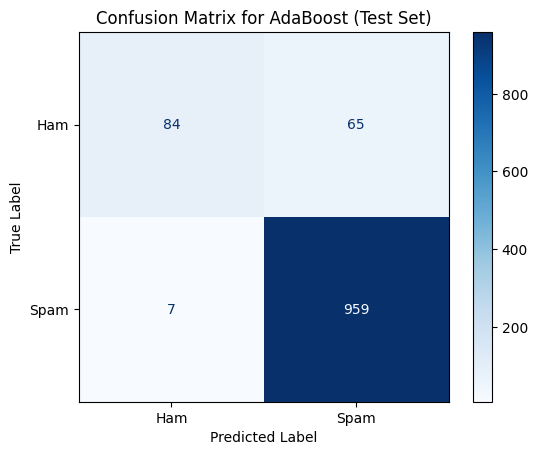

AdaBoost confusion matrix displayed successfully.


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for AdaBoost
cm_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)

# Display the confusion matrix
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=['Ham', 'Spam'])
disp_adaboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for AdaBoost (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("AdaBoost confusion matrix displayed successfully.")

In [29]:
from sklearn.metrics import classification_report

# Generate classification report for the training set
print("AdaBoost Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_adaboost))

# Generate classification report for the test set
print("\nAdaBoost Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_adaboost))

print("Classification reports displayed successfully.")

AdaBoost Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.93      0.57      0.71       598
           1       0.94      0.99      0.96      3859

    accuracy                           0.94      4457
   macro avg       0.94      0.78      0.83      4457
weighted avg       0.94      0.94      0.93      4457


AdaBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       149
           1       0.94      0.99      0.96       966

    accuracy                           0.94      1115
   macro avg       0.93      0.78      0.83      1115
weighted avg       0.93      0.94      0.93      1115

Classification reports displayed successfully.


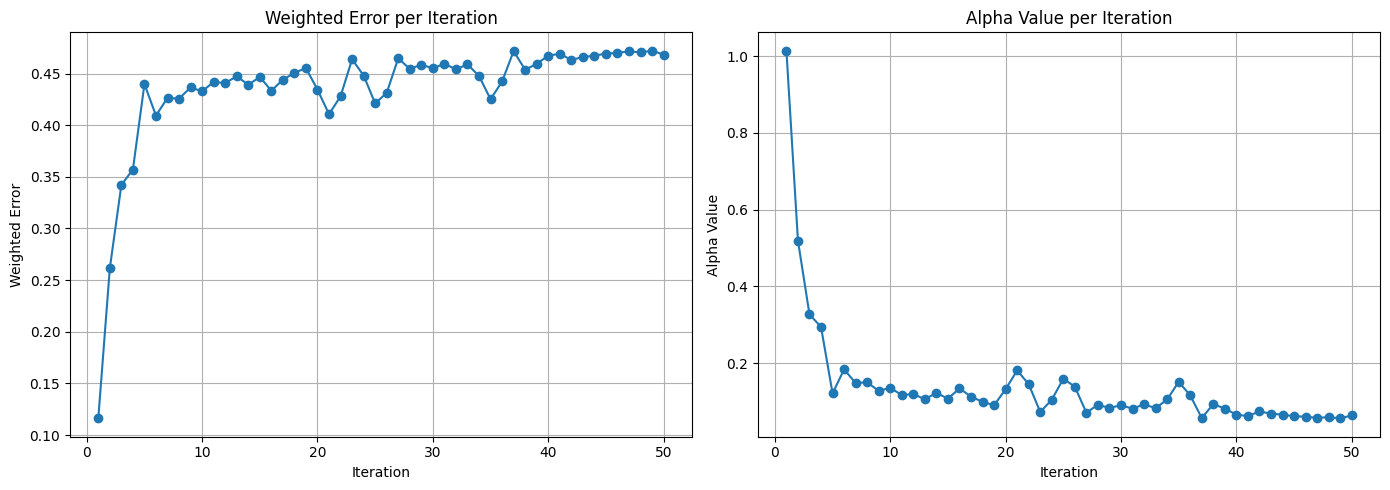

Weighted error and alpha value plots generated successfully.


In [30]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Weighted Error per Iteration
axes[0].plot(range(1, len(weighted_errors) + 1), weighted_errors, marker='o', linestyle='-')
axes[0].set_title('Weighted Error per Iteration')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Weighted Error')
axes[0].grid(True)

# Plot Alpha Value per Iteration
axes[1].plot(range(1, len(alphas) + 1), alphas, marker='o', linestyle='-')
axes[1].set_title('Alpha Value per Iteration')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Alpha Value')
axes[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

print("Weighted error and alpha value plots generated successfully.")

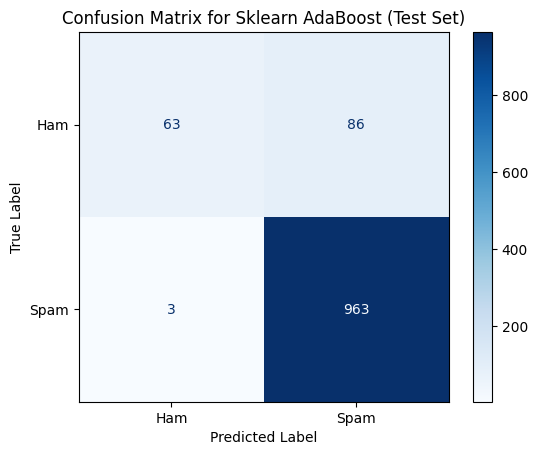

Sklearn AdaBoost confusion matrix displayed successfully.


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for Sklearn AdaBoost
cm_sklearn_adaboost = confusion_matrix(y_test, y_test_pred_sklearn_adaboost)

# Display the confusion matrix
disp_sklearn_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn_adaboost, display_labels=['Ham', 'Spam'])
disp_sklearn_adaboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Sklearn AdaBoost (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Sklearn AdaBoost confusion matrix displayed successfully.")

In [32]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred_sklearn_adaboost = adaboost_sklearn.predict(X_train)
y_test_pred_sklearn_adaboost = adaboost_sklearn.predict(X_test)

train_accuracy_sklearn_adaboost = accuracy_score(y_train, y_train_pred_sklearn_adaboost)
test_accuracy_sklearn_adaboost = accuracy_score(y_test, y_test_pred_sklearn_adaboost)

print(f"Sklearn AdaBoost Training Accuracy: {train_accuracy_sklearn_adaboost:.4f}")
print(f"Sklearn AdaBoost Test Accuracy: {test_accuracy_sklearn_adaboost:.4f}")

print("\nSklearn AdaBoost Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_sklearn_adaboost))

print("\nSklearn AdaBoost Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_sklearn_adaboost))

Sklearn AdaBoost Training Accuracy: 0.9188
Sklearn AdaBoost Test Accuracy: 0.9202

Sklearn AdaBoost Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.94      0.42      0.58       598
           1       0.92      1.00      0.96      3859

    accuracy                           0.92      4457
   macro avg       0.93      0.71      0.77      4457
weighted avg       0.92      0.92      0.90      4457


Sklearn AdaBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.42      0.59       149
           1       0.92      1.00      0.96       966

    accuracy                           0.92      1115
   macro avg       0.94      0.71      0.77      1115
weighted avg       0.92      0.92      0.91      1115



In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoostClassifier with specified parameters
# Note: base_estimator is deprecated in scikit-learn 1.2 and removed in 1.4
# For newer versions, use `estimator=DecisionTreeClassifier(...)`
adaboost_sklearn = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.6,
    random_state=42
)

# Train the AdaBoost model
adaboost_sklearn.fit(X_train, y_train)

print("Sklearn AdaBoost Classifier trained successfully.")

Sklearn AdaBoost Classifier trained successfully.


Q2

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Load the heart_disease_uci.csv file into a pandas DataFrame
heart_df = pd.read_csv('heart_disease_uci.csv')

# Display initial info to understand data types and potential issues
print("Initial DataFrame info:")
heart_df.info()
print("\nInitial head of the DataFrame:")
display(heart_df.head())

# Rename the 'num' column to 'target' for consistency with the problem description
heart_df.rename(columns={'num': 'target'}, inplace=True)

# Handle missing values for numerical columns with median imputation
numerical_cols_with_nan = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols_with_nan:
    if heart_df[col].isnull().any():
        heart_df[col].fillna(heart_df[col].median(), inplace=True)

# Handle missing values for 'ca' and 'thal' and other categorical columns
# 'ca': Convert to numeric, fill NaNs with mode, then convert to int.
heart_df['ca'] = pd.to_numeric(heart_df['ca'], errors='coerce')
heart_df['ca'].fillna(heart_df['ca'].mode()[0], inplace=True)
heart_df['ca'] = heart_df['ca'].astype(int)

# 'thal': Replace '?' with NaN, then fill NaNs with mode.
heart_df['thal'] = heart_df['thal'].replace('?', np.nan)
heart_df['thal'].fillna(heart_df['thal'].mode()[0], inplace=True)

# Other categorical columns with potential NaNs or '?'
categorical_cols_to_check = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
for col in categorical_cols_to_check:
    if heart_df[col].dtype == 'object':
        if (heart_df[col] == '?').any(): # Handle '?' string literals if they exist
            heart_df[col].replace('?', np.nan, inplace=True)
        if heart_df[col].isnull().any(): # Fill actual NaNs with mode
            heart_df[col].fillna(heart_df[col].mode()[0], inplace=True)

# Drop irrelevant columns 'id' and 'dataset' before one-hot encoding
heart_df.drop(columns=['id', 'dataset'], inplace=True, errors='ignore')

# 2. Identify the categorical columns for one-hot encoding (these should now be clean)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 3. Apply one-hot encoding to these identified categorical columns
heart_df_encoded = pd.get_dummies(heart_df, columns=categorical_cols, drop_first=False)

print("\nDataFrame after one-hot encoding and missing value imputation:")
display(heart_df_encoded.head())

# 4. Separate the features (X) from the target variable (y)
X_heart = heart_df_encoded.drop('target', axis=1)
y_heart = heart_df_encoded['target']

print(f"\nShape of features (X_heart): {X_heart.shape}")
print(f"Shape of target (y_heart): {y_heart.shape}")

# 5. Split the data into training and testing sets
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart
)

# 6. Print the shapes of the resulting training and testing sets
print("\nShapes of training and testing sets:")
print(f"X_train_heart shape: {X_train_heart.shape}")
print(f"X_test_heart shape: {X_test_heart.shape}")
print(f"y_train_heart shape: {y_train_heart.shape}")
print(f"y_test_heart shape: {y_test_heart.shape}")

print("Data loaded, preprocessed (missing values handled, one-hot encoded), and split successfully.")

Initial DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Initial head of the DataFrame:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



DataFrame after one-hot encoding and missing value imputation:


/tmp/ipython-input-77063112.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_df[col].fillna(heart_df[col].median(), inplace=True)
/tmp/ipython-input-77063112.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,age,trestbps,chol,thalch,oldpeak,target,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,slope_downsloping,slope_flat,slope_upsloping,ca_0,ca_1,ca_2,ca_3,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,2,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
2,67,120.0,229.0,129.0,2.6,1,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0,True,False,False,True,...,False,False,True,True,False,False,False,False,True,False



Shape of features (X_heart): (920, 28)
Shape of target (y_heart): (920,)

Shapes of training and testing sets:
X_train_heart shape: (736, 28)
X_test_heart shape: (184, 28)
y_train_heart shape: (736,)
y_test_heart shape: (184,)
Data loaded, preprocessed (missing values handled, one-hot encoded), and split successfully.


In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a base estimator (Decision Stump)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoostClassifier
adaboost_heart = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.6,
    random_state=42
)

# Train the AdaBoost model on the heart disease training data
adaboost_heart.fit(X_train_heart, y_train_heart)

print("AdaBoost Classifier trained successfully on the Heart Disease dataset.")
print(f"Number of estimators: {adaboost_heart.n_estimators}")

AdaBoost Classifier trained successfully on the Heart Disease dataset.
Number of estimators: 100


AdaBoost (Heart Disease) Training Accuracy: 0.5856
AdaBoost (Heart Disease) Test Accuracy: 0.5326


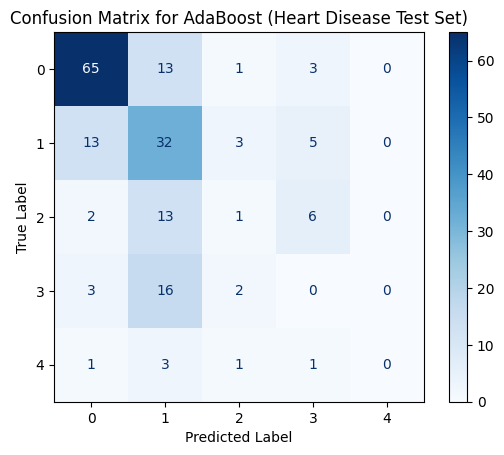

AdaBoost (Heart Disease) evaluation complete and confusion matrix displayed.


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the training and test sets
y_train_pred_adaboost_heart = adaboost_heart.predict(X_train_heart)
y_test_pred_adaboost_heart = adaboost_heart.predict(X_test_heart)

# Calculate accuracy
train_accuracy_adaboost_heart = accuracy_score(y_train_heart, y_train_pred_adaboost_heart)
test_accuracy_adaboost_heart = accuracy_score(y_test_heart, y_test_pred_adaboost_heart)

print(f"AdaBoost (Heart Disease) Training Accuracy: {train_accuracy_adaboost_heart:.4f}")
print(f"AdaBoost (Heart Disease) Test Accuracy: {test_accuracy_adaboost_heart:.4f}")

# Display Confusion Matrix for the test set
cm_adaboost_heart = confusion_matrix(y_test_heart, y_test_pred_adaboost_heart)
disp_adaboost_heart = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost_heart)
disp_adaboost_heart.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for AdaBoost (Heart Disease Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("AdaBoost (Heart Disease) evaluation complete and confusion matrix displayed.")

In [50]:
from sklearn.metrics import classification_report

# Generate classification report for the training set
print("AdaBoost (Heart Disease) Classification Report (Training Set):")
print(classification_report(y_train_heart, y_train_pred_adaboost_heart, zero_division=0))

# Generate classification report for the test set
print("\nAdaBoost (Heart Disease) Classification Report (Test Set):")
print(classification_report(y_test_heart, y_test_pred_adaboost_heart, zero_division=0))

print("Classification reports for AdaBoost (Heart Disease) displayed successfully.")

AdaBoost (Heart Disease) Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       329
           1       0.46      0.64      0.53       212
           2       0.29      0.14      0.19        87
           3       0.46      0.24      0.32        86
           4       1.00      0.05      0.09        22

    accuracy                           0.59       736
   macro avg       0.59      0.37      0.38       736
weighted avg       0.58      0.59      0.56       736


AdaBoost (Heart Disease) Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        82
           1       0.42      0.60      0.49        53
           2       0.12      0.05      0.07        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.53       184
   macro

Decision Stump (Heart Disease) trained successfully.
Predictions made for Decision Stump (Heart Disease).

Decision Stump (Heart Disease) Training Accuracy: 0.5408
Decision Stump (Heart Disease) Test Accuracy: 0.5761


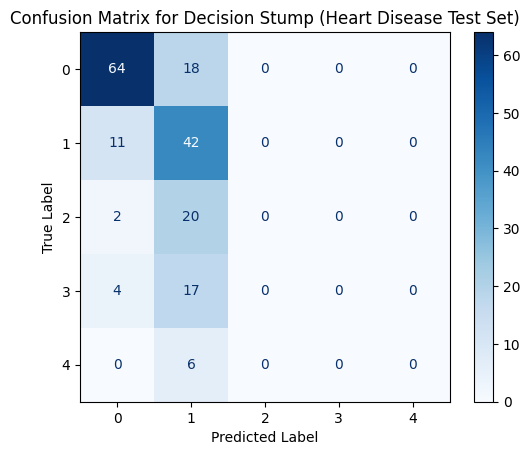

Confusion matrix for Decision Stump (Heart Disease) displayed successfully.

Decision Stump (Heart Disease) Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       329
           1       0.39      0.73      0.51       212
           2       0.00      0.00      0.00        87
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        22

    accuracy                           0.54       736
   macro avg       0.22      0.29      0.25       736
weighted avg       0.43      0.54      0.47       736


Decision Stump (Heart Disease) Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        82
           1       0.41      0.79      0.54        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00     

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1. Instantiate a Decision Stump classifier
decision_stump_heart = DecisionTreeClassifier(max_depth=1, random_state=42)

# 2. Fit the model to the training data
decision_stump_heart.fit(X_train_heart, y_train_heart)

print("Decision Stump (Heart Disease) trained successfully.")

# 3. Make predictions on training and test data
y_train_pred_stump_heart = decision_stump_heart.predict(X_train_heart)
y_test_pred_stump_heart = decision_stump_heart.predict(X_test_heart)

print("Predictions made for Decision Stump (Heart Disease).")

# 4. Calculate and print accuracies
train_accuracy_stump_heart = accuracy_score(y_train_heart, y_train_pred_stump_heart)
test_accuracy_stump_heart = accuracy_score(y_test_heart, y_test_pred_stump_heart)

print(f"\nDecision Stump (Heart Disease) Training Accuracy: {train_accuracy_stump_heart:.4f}")
print(f"Decision Stump (Heart Disease) Test Accuracy: {test_accuracy_stump_heart:.4f}")

# 5. Calculate and display confusion matrix for the test set
cm_stump_heart = confusion_matrix(y_test_heart, y_test_pred_stump_heart)
disp_stump_heart = ConfusionMatrixDisplay(confusion_matrix=cm_stump_heart)
disp_stump_heart.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Stump (Heart Disease Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Decision Stump (Heart Disease) displayed successfully.")

# 6. Print classification reports
print("\nDecision Stump (Heart Disease) Classification Report (Training Set):")
print(classification_report(y_train_heart, y_train_pred_stump_heart, zero_division=0))

print("\nDecision Stump (Heart Disease) Classification Report (Test Set):")
print(classification_report(y_test_heart, y_test_pred_stump_heart, zero_division=0))

print("Classification reports for Decision Stump (Heart Disease) displayed successfully.")

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Define hyperparameter lists
n_estimators_list = [5, 10, 25, 50, 100]
learning_rate_list = [0.1, 0.5, 1.0]

# 2. Create an empty list to store results
results = []

print("Starting AdaBoost hyperparameter tuning...")

# 3. Loop through each hyperparameter combination
for n_estimators_val in n_estimators_list:
    for learning_rate_val in learning_rate_list:
        # 4. Initialize a Decision Stump as the base estimator
        base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

        # 5. Initialize AdaBoostClassifier
        adaboost_tuned = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=n_estimators_val,
            learning_rate=learning_rate_val,
            random_state=42
        )

        # 6. Train the AdaBoost model
        adaboost_tuned.fit(X_train_heart, y_train_heart)

        # 7. Make predictions on the test set
        y_test_pred_tuned = adaboost_tuned.predict(X_test_heart)

        # 8. Calculate test accuracy
        test_accuracy = accuracy_score(y_test_heart, y_test_pred_tuned)

        # 9. Store the results
        results.append({
            'n_estimators': n_estimators_val,
            'learning_rate': learning_rate_val,
            'test_accuracy': test_accuracy
        })

        print(f"Trained AdaBoost with n_estimators={n_estimators_val}, learning_rate={learning_rate_val}. Test Accuracy: {test_accuracy:.4f}")

# 10. Print the results list
print("\nHyperparameter tuning complete. Results:")
for r in results:
    print(r)


Starting AdaBoost hyperparameter tuning...
Trained AdaBoost with n_estimators=5, learning_rate=0.1. Test Accuracy: 0.5761
Trained AdaBoost with n_estimators=5, learning_rate=0.5. Test Accuracy: 0.5652
Trained AdaBoost with n_estimators=5, learning_rate=1.0. Test Accuracy: 0.5761
Trained AdaBoost with n_estimators=10, learning_rate=0.1. Test Accuracy: 0.5761
Trained AdaBoost with n_estimators=10, learning_rate=0.5. Test Accuracy: 0.5924
Trained AdaBoost with n_estimators=10, learning_rate=1.0. Test Accuracy: 0.5380
Trained AdaBoost with n_estimators=25, learning_rate=0.1. Test Accuracy: 0.5978
Trained AdaBoost with n_estimators=25, learning_rate=0.5. Test Accuracy: 0.5815
Trained AdaBoost with n_estimators=25, learning_rate=1.0. Test Accuracy: 0.5380
Trained AdaBoost with n_estimators=50, learning_rate=0.1. Test Accuracy: 0.5924
Trained AdaBoost with n_estimators=50, learning_rate=0.5. Test Accuracy: 0.5435
Trained AdaBoost with n_estimators=50, learning_rate=1.0. Test Accuracy: 0.5435


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

print("Results DataFrame created successfully:")
display(results_df.head())

Results DataFrame created successfully:


,n_estimators,learning_rate,test_accuracy
0,5,0.1,0.576087
1,5,0.5,0.565217
2,5,1.0,0.576087
3,10,0.1,0.576087
4,10,0.5,0.592391


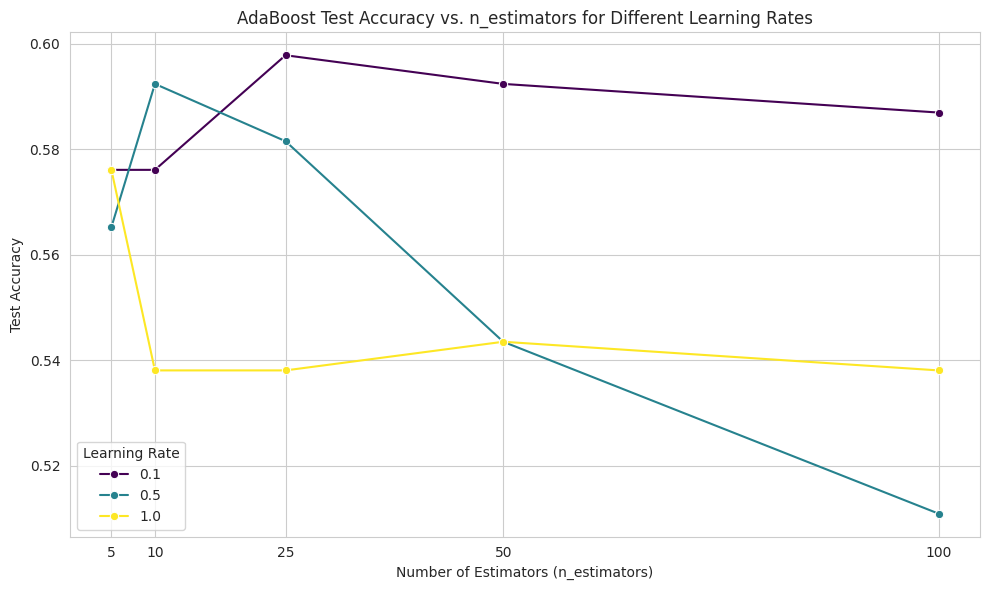


Best performing AdaBoost configuration:
  n_estimators: 25.0
  learning_rate: 0.1
  Test Accuracy: 0.5978


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='n_estimators', y='test_accuracy', hue='learning_rate', marker='o', palette='viridis')

plt.title('AdaBoost Test Accuracy vs. n_estimators for Different Learning Rates')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Test Accuracy')
plt.legend(title='Learning Rate')
plt.xticks(n_estimators_list) # Ensure all n_estimators values are shown on x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify the best performing configuration
best_config = results_df.loc[results_df['test_accuracy'].idxmax()]

print("\nBest performing AdaBoost configuration:")
print(f"  n_estimators: {best_config['n_estimators']}")
print(f"  learning_rate: {best_config['learning_rate']}")
print(f"  Test Accuracy: {best_config['test_accuracy']:.4f}")

Retraining AdaBoost with best parameters: n_estimators=25, learning_rate=0.1
Best AdaBoost model trained successfully.


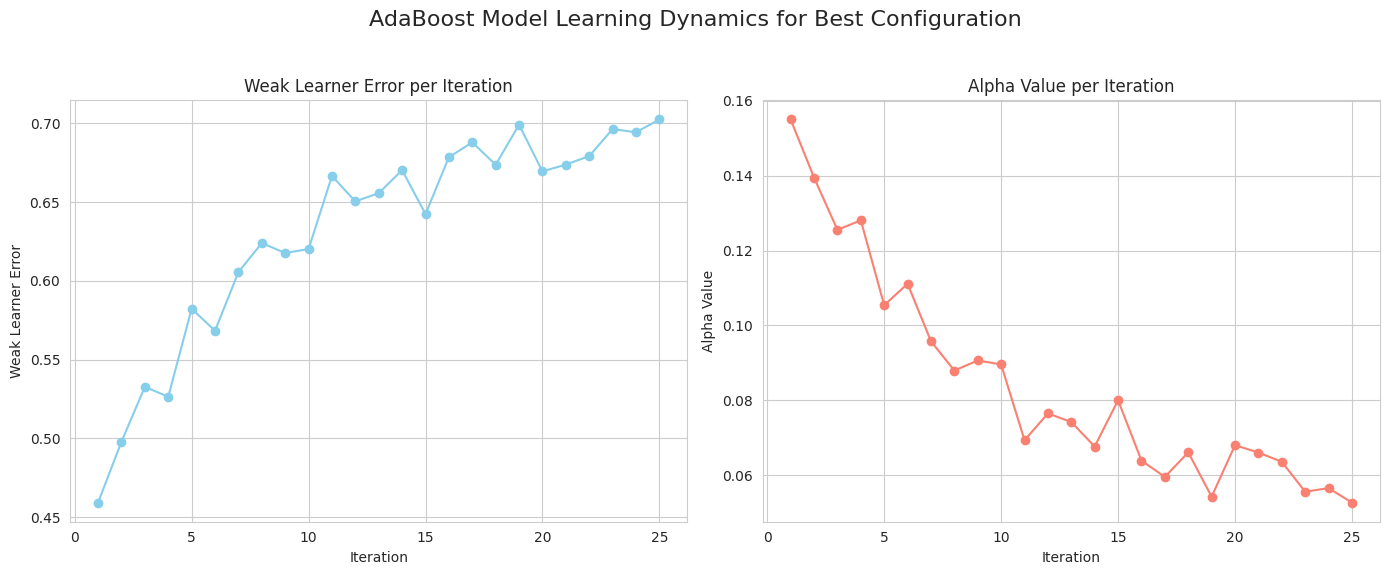

Weak learner error and alpha value plots generated successfully.


In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Best configuration identified from the previous step
n_estimators_best = int(best_config['n_estimators'])
learning_rate_best = best_config['learning_rate']

print(f"Retraining AdaBoost with best parameters: n_estimators={n_estimators_best}, learning_rate={learning_rate_best}")

# 1. Initialize a Decision Stump classifier as the base estimator
base_estimator_best = DecisionTreeClassifier(max_depth=1, random_state=42)

# 2. Initialize AdaBoostClassifier with the best parameters
adaboost_best = AdaBoostClassifier(
    estimator=base_estimator_best,
    n_estimators=n_estimators_best,
    learning_rate=learning_rate_best,
    random_state=42
)

# 3. Train the AdaBoost model
adaboost_best.fit(X_train_heart, y_train_heart)

print("Best AdaBoost model trained successfully.")

# 4. Extract weak learner errors
weak_learner_errors = adaboost_best.estimator_errors_

# 5. Extract alpha values (learner weights)
alpha_values = adaboost_best.estimator_weights_

# Create a figure with two subplots side-by-side
plt.figure(figsize=(14, 6))

# Plot Weak Learner Error vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(range(1, n_estimators_best + 1), weak_learner_errors, marker='o', linestyle='-', color='skyblue')
plt.title('Weak Learner Error per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Weak Learner Error')
plt.grid(True)

# Plot Alpha Value vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, n_estimators_best + 1), alpha_values, marker='o', linestyle='-', color='salmon')
plt.title('Alpha Value per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Alpha Value')
plt.grid(True)

# Add a main title for the entire figure
plt.suptitle('AdaBoost Model Learning Dynamics for Best Configuration', fontsize=16)

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

print("Weak learner error and alpha value plots generated successfully.")

Top 5 most important features:
cp_asymptomatic    0.377969
oldpeak            0.208756
chol               0.126864
age                0.099155
thal_normal        0.068312
dtype: float64


/tmp/ipython-input-399351949.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.index, y=top_5_features.values, palette='viridis')


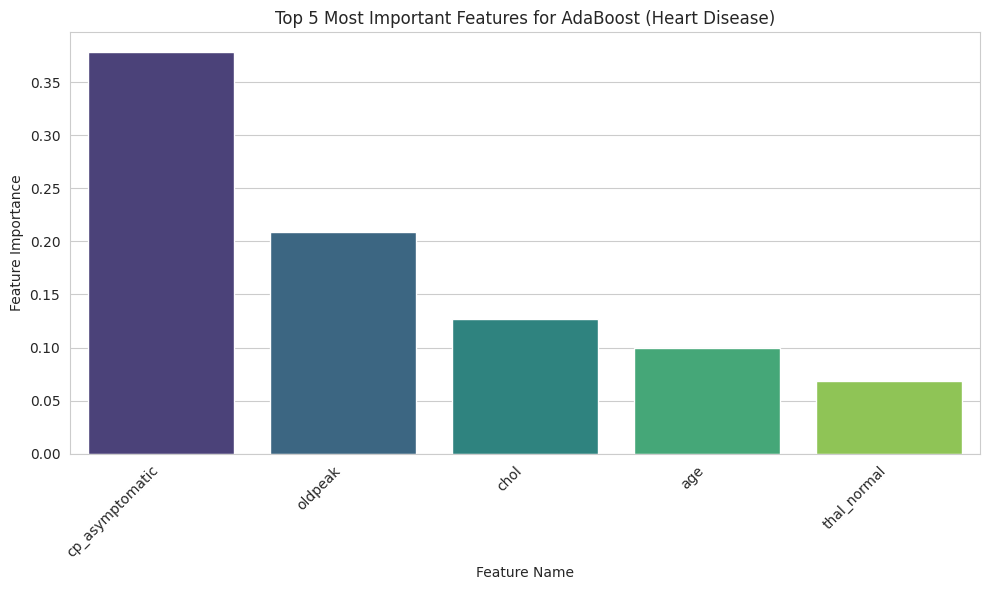

Top 5 feature importances plotted successfully.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances
feature_importances = adaboost_best.feature_importances_

# 2. Create a pandas Series with feature names as index
feature_names = X_train_heart.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort feature importances in descending order and select the top 5
top_5_features = importance_series.nlargest(5)

print("Top 5 most important features:")
print(top_5_features)

# 4. Create a bar plot of these top 5 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features.index, y=top_5_features.values, palette='viridis')
plt.title('Top 5 Most Important Features for AdaBoost (Heart Disease)')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

print("Top 5 feature importances plotted successfully.")

Top 5 most important features:
cp_asymptomatic    0.377969
oldpeak            0.208756
chol               0.126864
age                0.099155
thal_normal        0.068312
dtype: float64


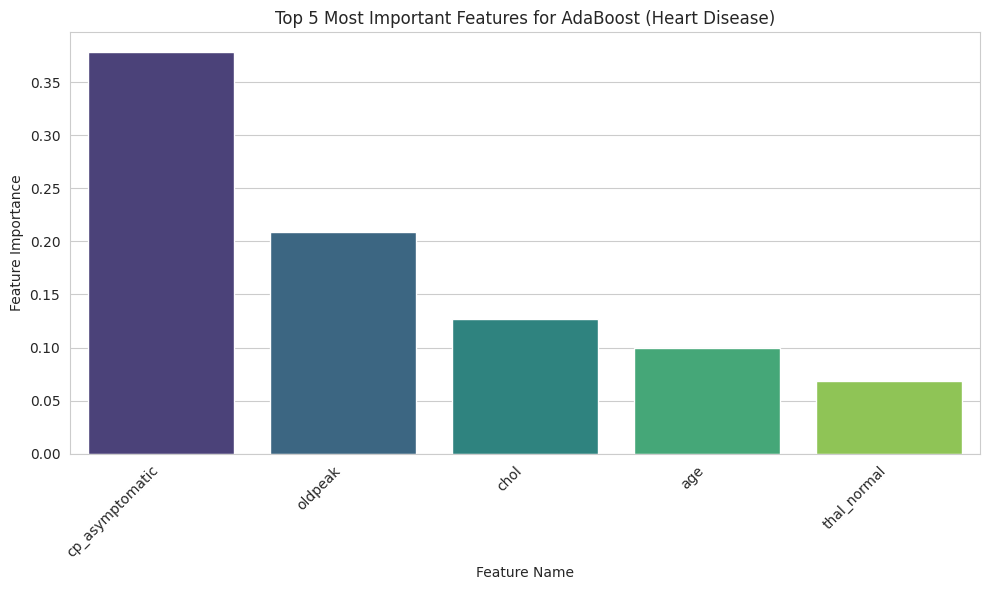

Top 5 feature importances plotted successfully.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances
feature_importances = adaboost_best.feature_importances_

# 2. Create a pandas Series with feature names as index
feature_names = X_train_heart.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort feature importances in descending order and select the top 5
top_5_features = importance_series.nlargest(5)

print("Top 5 most important features:")
print(top_5_features)

# 4. Create a bar plot of these top 5 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features.index, y=top_5_features.values, hue=top_5_features.index, palette='viridis', legend=False)
plt.title('Top 5 Most Important Features for AdaBoost (Heart Disease)')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

print("Top 5 feature importances plotted successfully.")